# GPS Data Visualization

- Read data from `../dataset/csv/gps_data.csv` and visualize trajectory using matplotlib
- Convert GPS coordinates (latitude/longitude) to relative coordinates with the starting point as origin
- Visualize trajectory in 2D and 3D views

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

# Set font and style for visualization
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Read GPS Data

In [2]:
# Read GPS data
gps_data_path = "../dataset/csv/gps_data.csv"

if os.path.exists(gps_data_path):
    df = pd.read_csv(gps_data_path)
    print(f"Successfully read data, total {len(df)} rows")
    print("\nData columns:")
    print(df.columns.tolist())
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nData basic information:")
    print(df.describe())
else:
    print(f"Error: Cannot find file {gps_data_path}")
    print("Please ensure gps_data.csv file exists in the correct location")

Successfully read data, total 2039 rows

Data columns:
['timestamp', 'latitude', 'longitude', 'altitude', 'status_status', 'status_service']

First 5 rows:
      timestamp   latitude  longitude  altitude  status_status  status_service
0  1.573567e+09  42.358337 -71.094572   -21.056              2               1
1  1.573567e+09  42.358337 -71.094572   -21.023              2               1
2  1.573567e+09  42.358337 -71.094572   -20.998              2               1
3  1.573567e+09  42.358336 -71.094573   -20.986              2               1
4  1.573567e+09  42.358336 -71.094573   -20.953              2               1

Data basic information:
          timestamp     latitude    longitude     altitude  status_status  \
count  2.039000e+03  2039.000000  2039.000000  2039.000000    2039.000000   
mean   1.573567e+09    42.358288   -71.094547   -20.879895       1.876410   
std    1.177492e+02     0.000299     0.000789     0.779728       0.481684   
min    1.573567e+09    42.357858   -7

## 2. Data Preprocessing

In [3]:
# Data preprocessing
if 'df' in locals():
    # Check for missing values
    print("Missing values check:")
    print(df.isnull().sum())
    
    # Remove rows with missing values
    df = df.dropna()
    print(f"\nData rows after removing missing values: {len(df)}")
    
    # Remove duplicate data
    df = df.drop_duplicates()
    print(f"Data rows after deduplication: {len(df)}")
    
    # Sort by timestamp
    df = df.sort_values('timestamp').reset_index(drop=True)
    
    # Calculate time intervals
    df['dt'] = df['timestamp'].diff().fillna(0)
    print(f"\nTime interval statistics (seconds):")
    print(f"Average: {df['dt'].mean():.6f}")
    print(f"Minimum: {df['dt'].min():.6f}")
    print(f"Maximum: {df['dt'].max():.6f}")
    
    # Extract data
    timestamps = df['timestamp'].values
    latitudes = df['latitude'].values
    longitudes = df['longitude'].values
    altitudes = df['altitude'].values
    
    # GPS status check
    if 'status_status' in df.columns:
        status_counts = df['status_status'].value_counts()
        print(f"\nGPS status distribution:")
        print(status_counts)
    
    print("\nData extraction completed!")
else:
    print("Please run the data reading code above first")

Missing values check:
timestamp         0
latitude          0
longitude         0
altitude          0
status_status     0
status_service    0
dtype: int64

Data rows after removing missing values: 2039
Data rows after deduplication: 2039

Time interval statistics (seconds):
Average: 0.199896
Minimum: 0.000000
Maximum: 0.313079

GPS status distribution:
status_status
2    1913
0     126
Name: count, dtype: int64

Data extraction completed!


## 3. Convert GPS to Relative Coordinates

In [4]:
def latlon_to_meters(lat1, lon1, lat2, lon2):
    """
    Calculate distance in meters between two GPS coordinates using Haversine formula
    
    Parameters:
    lat1, lon1: Latitude and longitude of point 1 (degrees)
    lat2, lon2: Latitude and longitude of point 2 (degrees)
    
    Returns:
    dx: Distance in east direction (meters)
    dy: Distance in north direction (meters)
    """
    R = 6371000  # Earth radius in meters
    
    # Convert to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    # Calculate differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Calculate relative positions
    dy = R * dlat  # North direction
    dx = R * np.cos(lat1_rad) * dlon  # East direction
    
    return dx, dy

def gps_to_relative_coordinates(latitudes, longitudes, altitudes):
    """
    Convert GPS coordinates to relative coordinates with the starting point as origin
    
    Parameters:
    latitudes: Array of latitudes (degrees)
    longitudes: Array of longitudes (degrees)
    altitudes: Array of altitudes (meters)
    
    Returns:
    position_x: Relative X position (meters, east direction)
    position_y: Relative Y position (meters, north direction)
    position_z: Relative Z position (meters, altitude relative to start)
    """
    # Use the first point as origin
    origin_lat = latitudes[0]
    origin_lon = longitudes[0]
    origin_alt = altitudes[0]
    
    N = len(latitudes)
    position_x = np.zeros(N)
    position_y = np.zeros(N)
    position_z = np.zeros(N)
    
    for i in range(N):
        dx, dy = latlon_to_meters(origin_lat, origin_lon, latitudes[i], longitudes[i])
        position_x[i] = dx
        position_y[i] = dy
        position_z[i] = altitudes[i] - origin_alt
    
    return position_x, position_y, position_z

# Convert GPS coordinates to relative coordinates
if 'latitudes' in locals():
    print("Converting GPS coordinates to relative coordinates...")
    
    position_x, position_y, position_z = gps_to_relative_coordinates(latitudes, longitudes, altitudes)
    
    print("Conversion completed!")
    print(f"\nGPS statistics:")
    print(f"Latitude range: [{np.min(latitudes):.8f}, {np.max(latitudes):.8f}] deg")
    print(f"Longitude range: [{np.min(longitudes):.8f}, {np.max(longitudes):.8f}] deg")
    print(f"Altitude range: [{np.min(altitudes):.2f}, {np.max(altitudes):.2f}] m")
    print(f"\nRelative position statistics:")
    print(f"X (East) range: [{np.min(position_x):.2f}, {np.max(position_x):.2f}] m")
    print(f"Y (North) range: [{np.min(position_y):.2f}, {np.max(position_y):.2f}] m")
    print(f"Z (Altitude) range: [{np.min(position_z):.2f}, {np.max(position_z):.2f}] m")
    print(f"\nDistance from origin:")
    distance = np.sqrt(position_x**2 + position_y**2)
    print(f"Max distance: {np.max(distance):.2f} m")
    print(f"Final position: X={position_x[-1]:.2f}, Y={position_y[-1]:.2f}, Z={position_z[-1]:.2f} m")
else:
    print("Please run the data preprocessing code first")

Converting GPS coordinates to relative coordinates...
Conversion completed!

GPS statistics:
Latitude range: [42.35785832, 42.35885786] deg
Longitude range: [-71.09587660, -71.09328384] deg
Altitude range: [-23.68, -18.39] m

Relative position statistics:
X (East) range: [-107.20, 105.84] m
Y (North) range: [-53.21, 57.93] m
Z (Altitude) range: [-2.63, 2.67] m

Distance from origin:
Max distance: 108.20 m
Final position: X=-7.15, Y=2.65, Z=0.60 m


## 4. Calculate Velocity and Trajectory Statistics

In [5]:
# Calculate velocity and trajectory statistics
if 'position_x' in locals():
    # Calculate velocity from position changes
    dt = df['dt'].values
    
    # Initialize velocity arrays
    velocity = np.zeros((len(position_x), 3))
    speed = np.zeros(len(position_x))
    
    for i in range(1, len(position_x)):
        if dt[i] > 0:
            velocity[i] = (np.array([position_x[i], position_y[i], position_z[i]]) - 
                           np.array([position_x[i-1], position_y[i-1], position_z[i-1]])) / dt[i]
            speed[i] = np.linalg.norm(velocity[i])
        else:
            velocity[i] = velocity[i-1]
            speed[i] = speed[i-1]
    
    # Calculate trajectory length
    dx = np.diff(position_x)
    dy = np.diff(position_y)
    dz = np.diff(position_z)
    segment_lengths = np.sqrt(dx**2 + dy**2 + dz**2)
    total_distance = np.sum(segment_lengths)
    
    # Calculate horizontal distance (XY plane)
    horizontal_distance = np.sum(np.sqrt(dx**2 + dy**2))
    
    # Calculate altitude change
    altitude_change = np.abs(position_z[-1] - position_z[0])
    
    print("=== Trajectory Statistics ===")
    print(f"Total distance: {total_distance:.2f} m")
    print(f"Horizontal distance: {horizontal_distance:.2f} m")
    print(f"Altitude change: {altitude_change:.2f} m")
    print(f"\nSpeed statistics:")
    print(f"  Average speed: {np.mean(speed[speed > 0]):.2f} m/s")
    print(f"  Max speed: {np.max(speed):.2f} m/s")
    print(f"  Min speed: {np.min(speed[speed > 0]):.2f} m/s")
    
    # Time statistics
    total_time = timestamps[-1] - timestamps[0]
    avg_dt = np.mean(dt[dt > 0])
    print(f"\nTime statistics:")
    print(f"Total time: {total_time:.2f} s")
    print(f"Average sampling interval: {avg_dt*1000:.2f} ms")
    print(f"Average sampling frequency: {1/avg_dt:.2f} Hz")
    
else:
    print("Please run the GPS coordinate conversion code first")

=== Trajectory Statistics ===
Total distance: 632.36 m
Horizontal distance: 565.30 m
Altitude change: 0.60 m

Speed statistics:
  Average speed: 1.56 m/s
  Max speed: 14.21 m/s
  Min speed: 0.14 m/s

Time statistics:
Total time: 407.59 s
Average sampling interval: 199.99 ms
Average sampling frequency: 5.00 Hz


## 5. Visualization Results

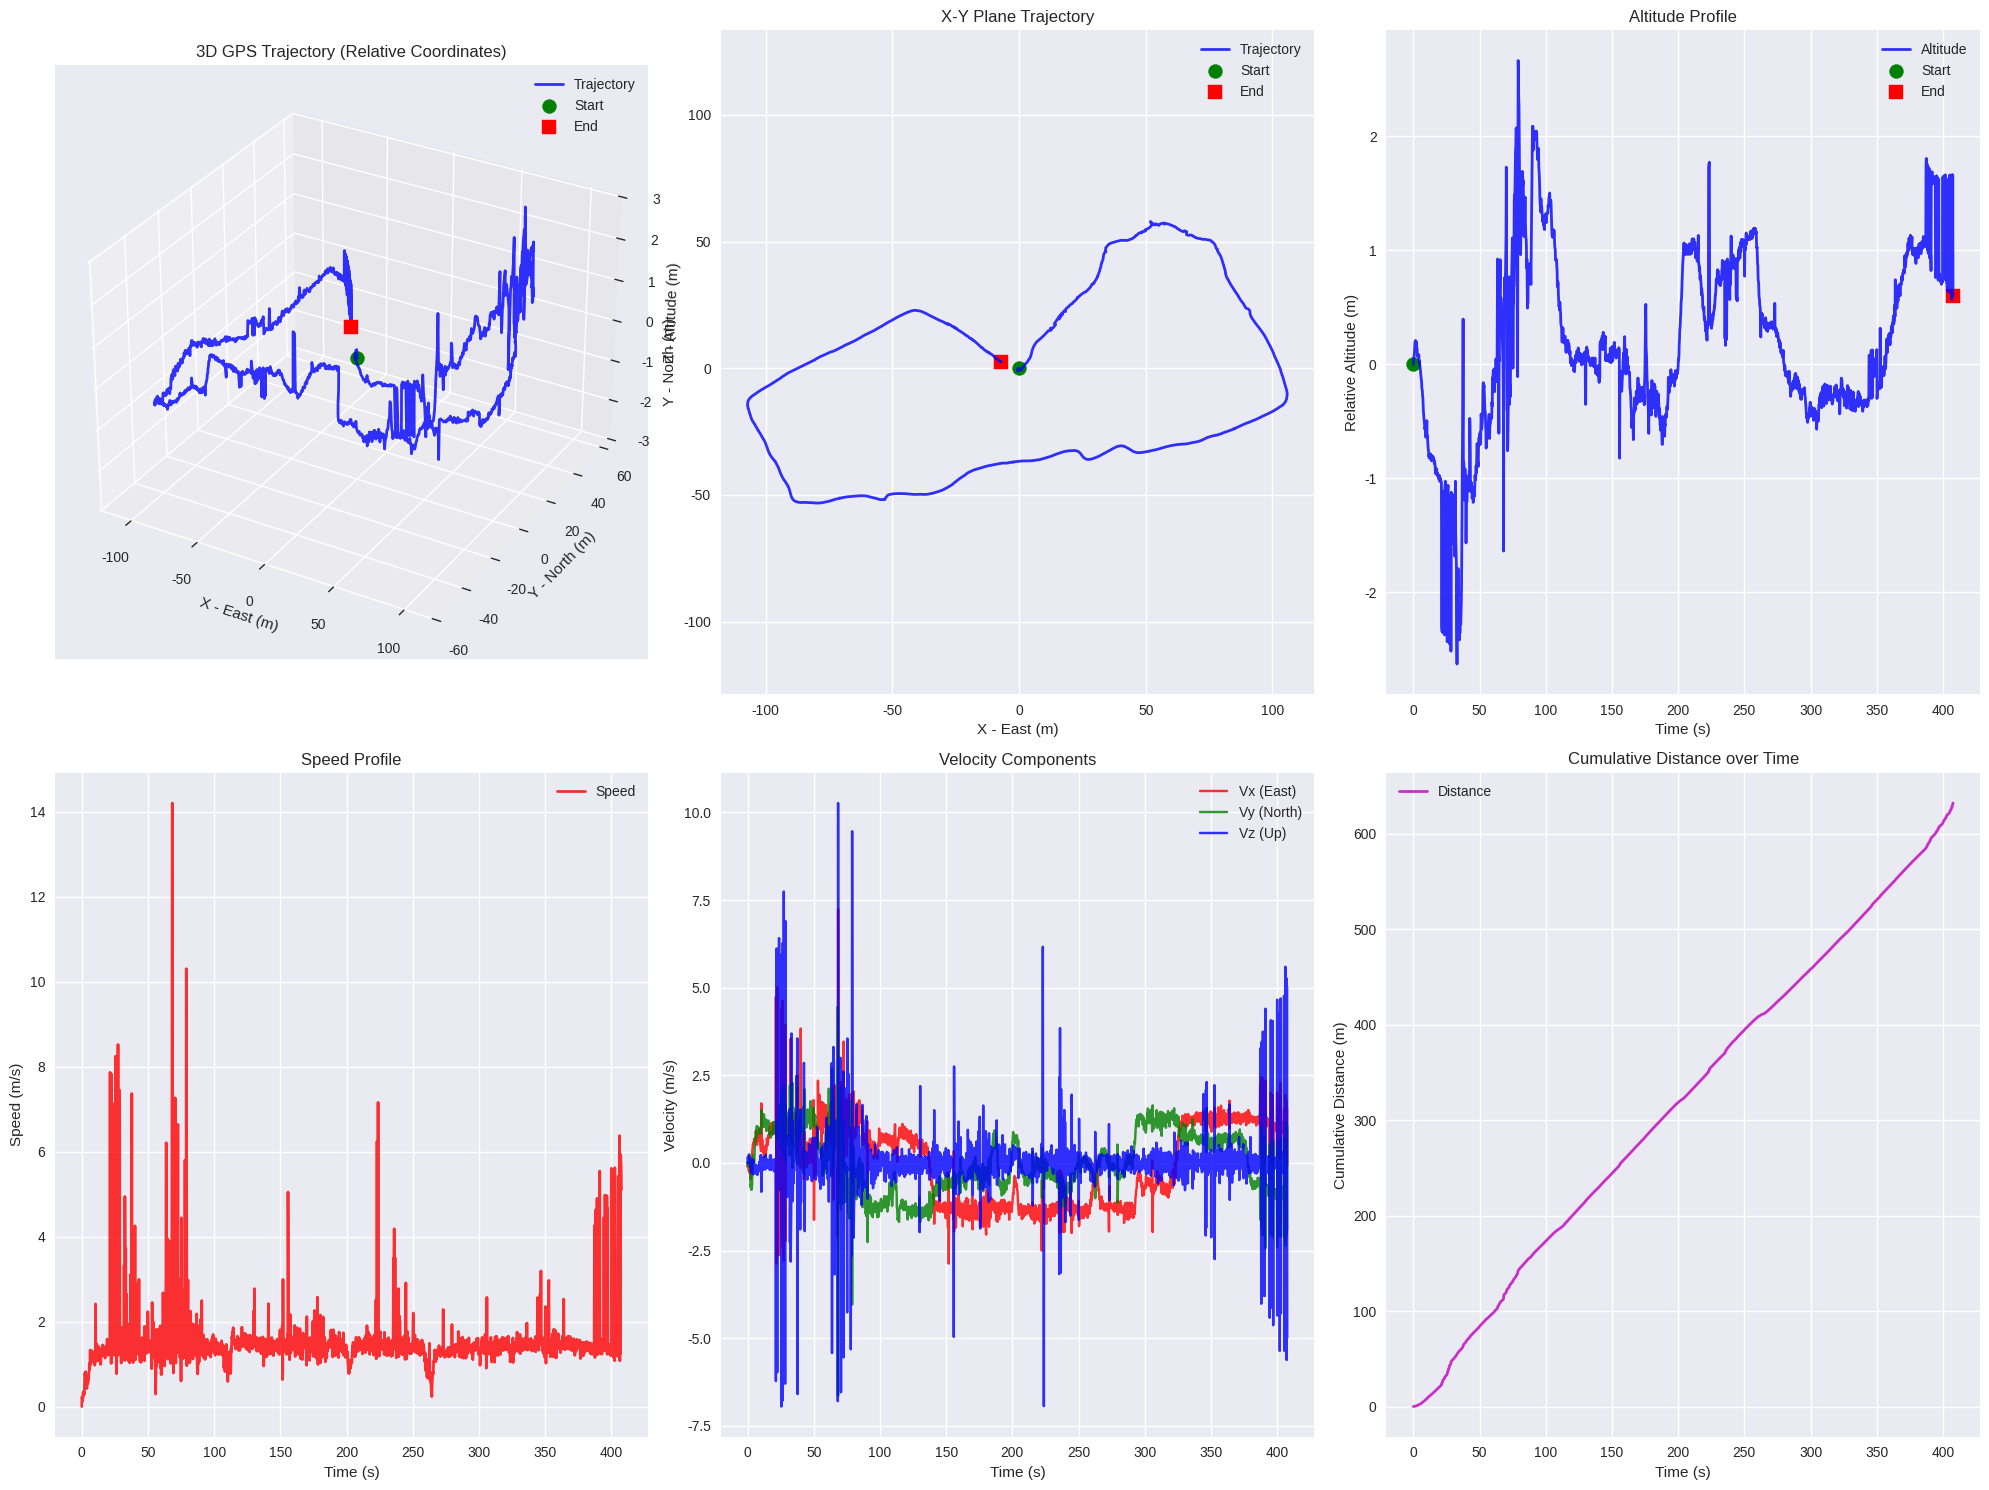

Visualization completed!


In [6]:
# Create visualization charts
if 'position_x' in locals():
    fig = plt.figure(figsize=(20, 15))
    
    # 1. 3D Trajectory
    ax1 = fig.add_subplot(2, 3, 1, projection='3d')
    ax1.plot(position_x, position_y, position_z, 'b-', linewidth=2, alpha=0.8, label='Trajectory')
    ax1.scatter(position_x[0], position_y[0], position_z[0], color='green', s=100, label='Start', marker='o')
    ax1.scatter(position_x[-1], position_y[-1], position_z[-1], color='red', s=100, label='End', marker='s')
    ax1.set_xlabel('X - East (m)')
    ax1.set_ylabel('Y - North (m)')
    ax1.set_zlabel('Z - Altitude (m)')
    ax1.set_title('3D GPS Trajectory (Relative Coordinates)')
    ax1.legend(loc='best')
    ax1.grid(True)
    
    # 2. X-Y Plane Trajectory
    ax2 = fig.add_subplot(2, 3, 2)
    ax2.plot(position_x, position_y, 'b-', linewidth=2, alpha=0.8, label='Trajectory')
    ax2.scatter(position_x[0], position_y[0], color='green', s=100, label='Start', marker='o')
    ax2.scatter(position_x[-1], position_y[-1], color='red', s=100, label='End', marker='s')
    ax2.set_xlabel('X - East (m)')
    ax2.set_ylabel('Y - North (m)')
    ax2.set_title('X-Y Plane Trajectory')
    ax2.legend(loc='best')
    ax2.grid(True)
    ax2.axis('equal')
    
    # 3. Altitude Profile
    time_sec = timestamps - timestamps[0]
    ax3 = fig.add_subplot(2, 3, 3)
    ax3.plot(time_sec, position_z, 'b-', linewidth=2, alpha=0.8, label='Altitude')
    ax3.scatter(time_sec[0], position_z[0], color='green', s=100, label='Start', marker='o')
    ax3.scatter(time_sec[-1], position_z[-1], color='red', s=100, label='End', marker='s')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Relative Altitude (m)')
    ax3.set_title('Altitude Profile')
    ax3.legend(loc='best')
    ax3.grid(True)
    
    # 4. Speed Profile
    ax4 = fig.add_subplot(2, 3, 4)
    ax4.plot(time_sec, speed, 'r-', linewidth=2, alpha=0.8, label='Speed')
    ax4.set_xlabel('Time (s)')
    ax4.set_ylabel('Speed (m/s)')
    ax4.set_title('Speed Profile')
    ax4.legend(loc='best')
    ax4.grid(True)
    
    # 5. Velocity Components
    ax5 = fig.add_subplot(2, 3, 5)
    ax5.plot(time_sec, velocity[:, 0], 'r-', label='Vx (East)', alpha=0.8)
    ax5.plot(time_sec, velocity[:, 1], 'g-', label='Vy (North)', alpha=0.8)
    ax5.plot(time_sec, velocity[:, 2], 'b-', label='Vz (Up)', alpha=0.8)
    ax5.set_xlabel('Time (s)')
    ax5.set_ylabel('Velocity (m/s)')
    ax5.set_title('Velocity Components')
    ax5.legend(loc='best')
    ax5.grid(True)
    
    # 6. Distance over Time
    ax6 = fig.add_subplot(2, 3, 6)
    cumulative_distance = np.concatenate([[0], np.cumsum(segment_lengths)])
    ax6.plot(time_sec, cumulative_distance, 'm-', linewidth=2, alpha=0.8, label='Distance')
    ax6.set_xlabel('Time (s)')
    ax6.set_ylabel('Cumulative Distance (m)')
    ax6.set_title('Cumulative Distance over Time')
    ax6.legend(loc='best')
    ax6.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print("Visualization completed!")
else:
    print("Please run the GPS coordinate conversion code first")

## 5.5. Detailed GPS Coordinate View

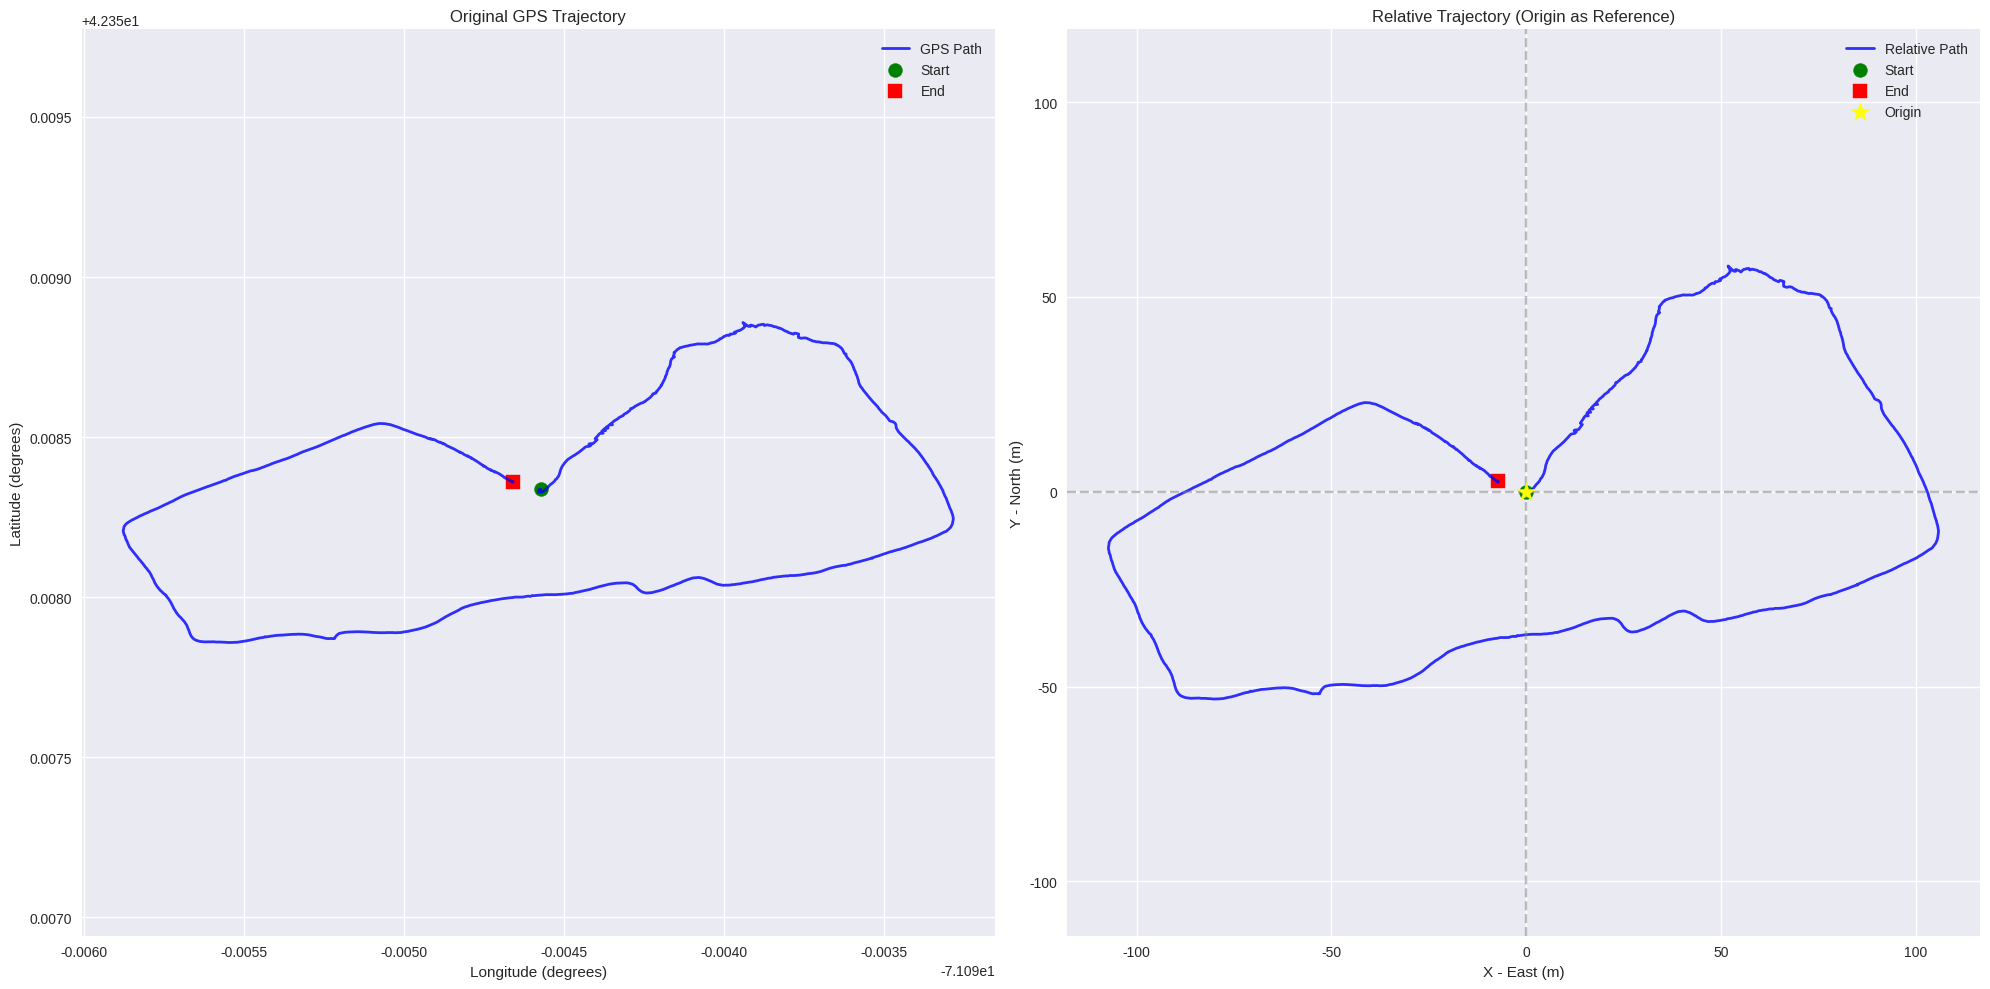

Detailed GPS coordinate visualization completed!


In [7]:
# Create detailed GPS coordinate visualization
if 'position_x' in locals():
    fig_detailed = plt.figure(figsize=(20, 10))
    
    # 1. Original GPS Coordinates (Latitude vs Longitude)
    ax1 = fig_detailed.add_subplot(1, 2, 1)
    ax1.plot(longitudes, latitudes, 'b-', linewidth=2, alpha=0.8, label='GPS Path')
    ax1.scatter(longitudes[0], latitudes[0], color='green', s=100, label='Start', marker='o')
    ax1.scatter(longitudes[-1], latitudes[-1], color='red', s=100, label='End', marker='s')
    ax1.set_xlabel('Longitude (degrees)')
    ax1.set_ylabel('Latitude (degrees)')
    ax1.set_title('Original GPS Trajectory')
    ax1.legend(loc='best')
    ax1.grid(True)
    ax1.axis('equal')
    
    # 2. Relative Coordinates (X vs Y)
    ax2 = fig_detailed.add_subplot(1, 2, 2)
    ax2.plot(position_x, position_y, 'b-', linewidth=2, alpha=0.8, label='Relative Path')
    ax2.scatter(position_x[0], position_y[0], color='green', s=100, label='Start', marker='o')
    ax2.scatter(position_x[-1], position_y[-1], color='red', s=100, label='End', marker='s')
    # Add origin marker
    ax2.scatter(0, 0, color='yellow', s=200, marker='*', label='Origin', zorder=10)
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax2.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    ax2.set_xlabel('X - East (m)')
    ax2.set_ylabel('Y - North (m)')
    ax2.set_title('Relative Trajectory (Origin as Reference)')
    ax2.legend(loc='best')
    ax2.grid(True)
    ax2.axis('equal')
    
    plt.tight_layout()
    plt.show()
    
    print("Detailed GPS coordinate visualization completed!")
else:
    print("Please run the GPS coordinate conversion code first")

## 6. Statistical Analysis

In [8]:
# Detailed statistical analysis
if 'position_x' in locals():
    print("=== GPS Data Detailed Statistical Analysis ===")
    print()
    
    # Position statistics
    print("Position Statistics (Relative Coordinates):")
    print(f"X (East): Mean={np.mean(position_x):.2f}, Std={np.std(position_x):.2f}, "
          f"Min={np.min(position_x):.2f}, Max={np.max(position_x):.2f} m")
    print(f"Y (North): Mean={np.mean(position_y):.2f}, Std={np.std(position_y):.2f}, "
          f"Min={np.min(position_y):.2f}, Max={np.max(position_y):.2f} m")
    print(f"Z (Altitude): Mean={np.mean(position_z):.2f}, Std={np.std(position_z):.2f}, "
          f"Min={np.min(position_z):.2f}, Max={np.max(position_z):.2f} m")
    print()
    
    # Velocity statistics
    print("Velocity Statistics:")
    print(f"Vx (East): Mean={np.mean(velocity[:,0]):.2f}, Std={np.std(velocity[:,0]):.2f}, "
          f"Min={np.min(velocity[:,0]):.2f}, Max={np.max(velocity[:,0]):.2f} m/s")
    print(f"Vy (North): Mean={np.mean(velocity[:,1]):.2f}, Std={np.std(velocity[:,1]):.2f}, "
          f"Min={np.min(velocity[:,1]):.2f}, Max={np.max(velocity[:,1]):.2f} m/s")
    print(f"Vz (Up): Mean={np.mean(velocity[:,2]):.2f}, Std={np.std(velocity[:,2]):.2f}, "
          f"Min={np.min(velocity[:,2]):.2f}, Max={np.max(velocity[:,2]):.2f} m/s")
    print()
    
    # Original GPS coordinates statistics
    print("Original GPS Coordinates:")
    print(f"Start position: Lat={latitudes[0]:.8f}, Lon={longitudes[0]:.8f}, Alt={altitudes[0]:.2f} m")
    print(f"End position: Lat={latitudes[-1]:.8f}, Lon={longitudes[-1]:.8f}, Alt={altitudes[-1]:.2f} m")
    print(f"Latitude change: {latitudes[-1] - latitudes[0]:.8f} deg")
    print(f"Longitude change: {longitudes[-1] - longitudes[0]:.8f} deg")
    print(f"Altitude change: {altitudes[-1] - altitudes[0]:.2f} m")
    print()
    
    # Bounding box
    print("Trajectory Bounding Box (Relative Coordinates):")
    print(f"X range: [{np.min(position_x):.2f}, {np.max(position_x):.2f}] m (width: {np.max(position_x) - np.min(position_x):.2f} m)")
    print(f"Y range: [{np.min(position_y):.2f}, {np.max(position_y):.2f}] m (height: {np.max(position_y) - np.min(position_y):.2f} m)")
    print(f"Z range: [{np.min(position_z):.2f}, {np.max(position_z):.2f}] m (vertical span: {np.max(position_z) - np.min(position_z):.2f} m)")
    print()
    
    # Directional statistics
    displacements = np.sqrt(position_x**2 + position_y**2)
    print("Distance from Origin Statistics:")
    print(f"Mean: {np.mean(displacements):.2f} m")
    print(f"Max: {np.max(displacements):.2f} m")
    print(f"Min: {np.min(displacements):.2f} m")
    print(f"Final distance: {displacements[-1]:.2f} m")
    
else:
    print("Please run the GPS coordinate conversion code first")

=== GPS Data Detailed Statistical Analysis ===

Position Statistics (Relative Coordinates):
X (East): Mean=2.07, Std=64.85, Min=-107.20, Max=105.84 m
Y (North): Mean=-5.40, Std=33.20, Min=-53.21, Max=57.93 m
Z (Altitude): Mean=0.18, Std=0.78, Min=-2.63, Max=2.67 m

Velocity Statistics:
Vx (East): Mean=-0.02, Std=1.17, Min=-2.87, Max=7.24 m/s
Vy (North): Mean=0.01, Std=0.87, Min=-6.64, Max=4.46 m/s
Vz (Up): Mean=0.00, Std=1.03, Min=-6.95, Max=10.27 m/s

Original GPS Coordinates:
Start position: Lat=42.35833688, Lon=-71.09457199, Alt=-21.06 m
End position: Lat=42.35836075, Lon=-71.09465905, Alt=-20.46 m
Latitude change: 0.00002388 deg
Longitude change: -0.00008705 deg
Altitude change: 0.60 m

Trajectory Bounding Box (Relative Coordinates):
X range: [-107.20, 105.84] m (width: 213.04 m)
Y range: [-53.21, 57.93] m (height: 111.14 m)
Z range: [-2.63, 2.67] m (vertical span: 5.29 m)

Distance from Origin Statistics:
Mean: 67.05 m
Max: 108.20 m
Min: 0.00 m
Final distance: 7.63 m


## 7. Save Results

In [9]:
# Save processed data
if 'position_x' in locals():
    # Create output directory
    output_dir = "../dataset/visualization_results"
    os.makedirs(output_dir, exist_ok=True)
    
    # Save processed data
    processed_data = {
        'timestamp': timestamps,
        'dt': dt,
        'latitude': latitudes,
        'longitude': longitudes,
        'altitude': altitudes,
        'position_x': position_x,
        'position_y': position_y,
        'position_z': position_z,
        'velocity_x': velocity[:, 0],
        'velocity_y': velocity[:, 1],
        'velocity_z': velocity[:, 2],
        'speed': speed,
        'distance_from_origin': np.sqrt(position_x**2 + position_y**2 + position_z**2)
    }
    
    df_processed = pd.DataFrame(processed_data)
    output_file = os.path.join(output_dir, "gps_processed_data.csv")
    df_processed.to_csv(output_file, index=False)
    
    print(f"Processed data saved to: {output_file}")
    print(f"Total records saved: {len(df_processed)}")
    
    # Save visualization image
    fig.savefig(os.path.join(output_dir, "gps_visualization.png"), dpi=300, bbox_inches='tight')
    print(f"Visualization image saved to: {output_dir}/gps_visualization.png")
    
    # Save detailed GPS coordinate view
    fig_detailed.savefig(os.path.join(output_dir, "gps_detailed_view.png"), dpi=300, bbox_inches='tight')
    print(f"Detailed view image saved to: {output_dir}/gps_detailed_view.png")
    
else:
    print("Please run the GPS coordinate conversion code first")

Processed data saved to: ../dataset/visualization_results/gps_processed_data.csv
Total records saved: 2039
Visualization image saved to: ../dataset/visualization_results/gps_visualization.png
Detailed view image saved to: ../dataset/visualization_results/gps_detailed_view.png


## 8. Summary

This Jupyter Notebook implements a complete GPS data visualization workflow:

1. **Data Reading**: Read GPS data from CSV file containing timestamp, latitude, longitude, and altitude
2. **Data Preprocessing**: Remove missing values, duplicates, sort by timestamp, and check GPS status
3. **Coordinate Conversion**: Convert GPS coordinates (latitude/longitude) to relative coordinates using the starting point as origin
   - X axis: East direction in meters
   - Y axis: North direction in meters
   - Z axis: Altitude relative to starting point in meters
4. **Velocity Calculation**: Compute velocity and speed from position changes
5. **Visualization**: Generate comprehensive charts including:
   - 3D trajectory plot
   - X-Y plane trajectory view
   - Altitude profile over time
   - Speed profile over time
   - Velocity components over time
   - Cumulative distance over time
   - Original GPS coordinates vs. relative coordinates comparison
6. **Statistical Analysis**: Provide detailed statistics for position, velocity, and trajectory metrics
7. **Result Saving**: Save processed data and visualization images

### Key Features:
- Automatic GPS data reading and validation
- Haversine formula for accurate distance calculation
- Relative coordinate system with starting point as origin for easy trajectory analysis
- Comprehensive visualization in multiple views (3D, 2D, time series)
- Detailed statistical analysis including speed, distance, and bounding box information
- Comparison between original GPS coordinates and relative coordinates
- Result file saving for further analysis

### Coordinate System:
- **Origin**: First GPS position in the dataset
- **X**: East distance from origin (meters)
- **Y**: North distance from origin (meters)
- **Z**: Altitude difference from origin (meters)